# Step 1: Data Loading and Preprocessing

### Step 1.1: Import Libraries and Display Sample Images

In this cell, we import the required libraries to handle file operations, image loading, and visualization. Specifically:
- `os` is used for directory and file path handling.
- `matplotlib.pyplot` is used for plotting images.
- `glob` is used to retrieve image file paths matching a specific pattern.
- `PIL` (Python Imaging Library) is used to open and display images.

The function `show_samples` is defined to display a set of sample images. It accepts a list of image paths and a title. It plots the first 5 images from the provided paths, displaying each image with a title indicating whether it belongs to the "Normal" or "Potholes" class. The images are loaded using `PIL.Image.open` and displayed using `matplotlib`.

We then retrieve the paths of all images in the "normal" and "potholes" directories using `glob` and display samples from both classes.



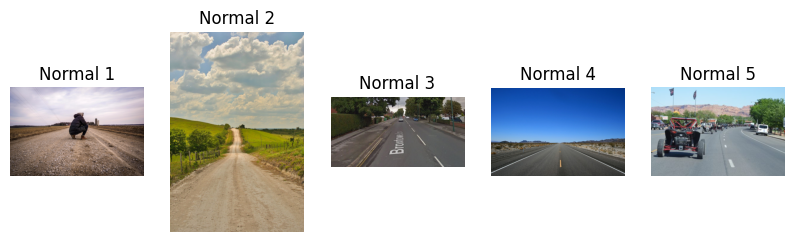

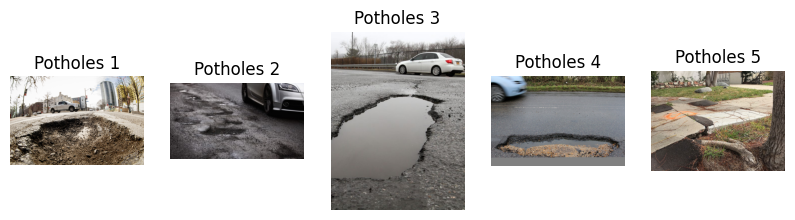

In [ ]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Paths to dataset
normal_path = '/content/drive/MyDrive/SC project/normal'
potholes_path = '/content/drive/MyDrive/SC project/potholes'

# Function to display sample images
def show_samples(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

# Show samples for both classes
normal_images = glob(os.path.join(normal_path, '*.jpg'))
potholes_images = glob(os.path.join(potholes_path, '*.jpg'))

show_samples(normal_images, 'Normal')
show_samples(potholes_images, 'Potholes')

### Step 1.2: Importing Libraries for Data Processing and Model Building

In this cell, we import several libraries essential for data manipulation and model building:
- `cv2` (OpenCV) for image processing.
- `numpy` for array operations.
- `matplotlib.pyplot` and `seaborn` for visualizations such as plots and charts.
- `scikit-learn` for model evaluation tools like classification reports and confusion matrices.
- `xgboost` for gradient boosting models.
- `tensorflow` and its submodules like `keras` to build and train neural network models.

Additionally, we use `warnings.filterwarnings('ignore')` to suppress any warnings that might be generated during model training or other operations, ensuring the notebook runs smoothly without unnecessary interruptions.



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
import warnings
warnings.filterwarnings('ignore')

### Step 1.3: Image Preprocessing

This cell defines a function `preprocess_image` to prepare the images for training. The function performs two main tasks:
1. It resizes images to a standard size of 128x128 pixels using OpenCV’s `cv2.resize` function, which is important to ensure that all input images have the same dimensions.
2. It normalizes the pixel values by dividing each pixel value by 255.0, which scales the values to the range [0, 1]. Normalization helps improve the performance and training speed of machine learning models.

The `IMG_SIZE` variable defines the target dimensions (128x128) for resizing.



In [ ]:
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalization
    return img

### Step 1.4: Load and Preprocess Images

In this cell, the function `load_and_preprocess_images` is defined to load images from a specified directory, preprocess them, and assign labels. It accepts two arguments:
- `folder`: The directory containing the images.
- `label`: The label assigned to the images in that directory (0 for "Normal", 1 for "Potholes").

The function iterates through each file in the directory, reads the image using OpenCV (`cv2.imread`), and preprocesses it using the previously defined `preprocess_image` function. The preprocessed image is then appended to a list of images, and the corresponding label is appended to a list of labels.

We then use this function to load and preprocess images from both the "normal" and "potholes" directories, assigning labels 0 and 1, respectively.



In [ ]:
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = preprocess_image(img)  # Preprocess the image
            images.append(img)
            labels.append(label)
    return images, labels

normal_images, normal_labels = load_and_preprocess_images('/content/drive/MyDrive/SC project/normal', 0)
potholes_images, potholes_labels = load_and_preprocess_images('/content/drive/MyDrive/SC project/potholes', 1)

### Step 1.5: Combine Normal and Potholes Images

In this cell, we combine the preprocessed images from both the "Normal" and "Potholes" classes into a single dataset. The images from both classes are stored in the variables `normal_images` and `potholes_images`, while their corresponding labels are stored in `normal_labels` and `potholes_labels`.

We concatenate the two image lists (`normal_images` and `potholes_images`) into a single array `X`, and similarly, we concatenate the label lists into a single array `y`. This results in two arrays:
- `X`: A collection of all preprocessed images.
- `y`: A collection of labels corresponding to those images.

This combined dataset will be used for training and evaluation in subsequent steps.



In [ ]:
X = np.array(normal_images + potholes_images)
y = np.array(normal_labels + potholes_labels)

### Step 1.6: Preprocess All Images

Here, we preprocess all the images in the combined dataset `X` using the `preprocess_image` function. We use list comprehension to apply the preprocessing function to each image in `X` and store the processed images in a new array `X_processed`. This ensures that all images are resized and normalized before being fed into the machine learning model.



In [ ]:
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

X_processed = np.array([preprocess_image(img) for img in X])

### Step 1.7: Split Data into Training and Validation Sets

In this cell, we split the preprocessed images (`X_processed`) and their corresponding labels (`y`) into training and validation sets using `train_test_split` from `scikit-learn`. The training set will be used to train the model, while the validation set will be used to evaluate its performance.

We specify a test size of 20% (0.2) to ensure that 80% of the data is used for training and 20% is used for validation. The `random_state` parameter ensures that the split is reproducible.



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Step 2: Visualize Class Distribution

In this cell, we visualize the distribution of the classes (Normal vs. Potholes) in the dataset. Two types of plots are created:
1. A pie chart that shows the percentage distribution of the two classes, with "Normal" images in green and "Potholes" images in red.
2. A bar plot that displays the count of images in each class using `seaborn.countplot`.

These visualizations help in understanding the balance or imbalance of the dataset, which can influence model performance.



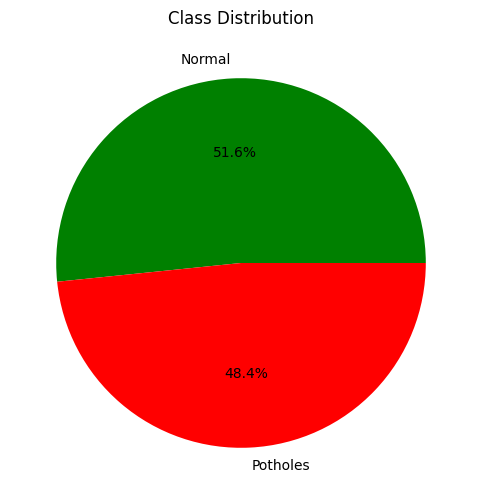

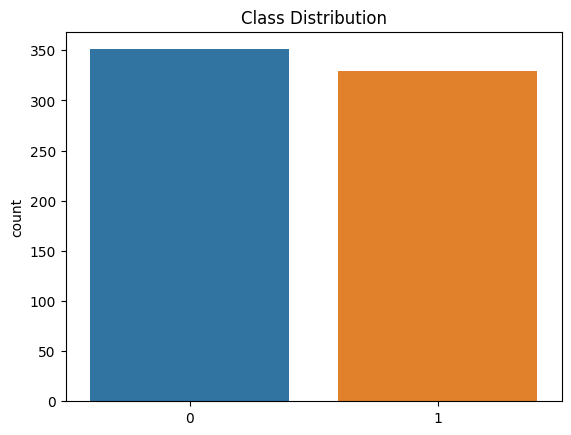

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(6, 6))
plt.pie([np.sum(y == 0), np.sum(y == 1)], labels=['Normal', 'Potholes'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Class Distribution')
plt.show()

# Bar plot for class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Step 3: Baseline Model Building and Training

### Step 3.1: Build and Train a Simple CNN Model

In this cell, we define a simple Convolutional Neural Network (CNN) model using Keras. The model consists of:
- Three convolutional layers (`Conv2D`), each followed by max-pooling layers (`MaxPooling2D`).
- A flattening layer (`Flatten`) to reshape the 2D feature maps into a 1D vector.
- A fully connected layer (`Dense`) with 128 units and a ReLU activation function.
- The final output layer with a single unit and a sigmoid activation function for binary classification (Normal vs. Potholes).

We compile the model using the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric. The model is then trained using the training data (`X_train`, `y_train`) for 20 epochs, with validation data (`X_val`, `y_val`) to monitor performance.



In [ ]:
baseline_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = baseline_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


I0000 00:00:1726236317.595581     104 service.cc:145] XLA service 0x7dd07c006340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726236317.595693     104 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5279 - loss: 0.6938

I0000 00:00:1726236320.730886     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5268 - loss: 0.6937 - val_accuracy: 0.5956 - val_loss: 0.6914
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5299 - loss: 0.6923 - val_accuracy: 0.5735 - val_loss: 0.6891
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6181 - loss: 0.6671 - val_accuracy: 0.5515 - val_loss: 0.6747
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6413 - loss: 0.6281 - val_accuracy: 0.7206 - val_loss: 0.5829
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6707 - loss: 0.5963 - val_accuracy: 0.7059 - val_loss: 0.5379
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7233 - loss: 0.5346 - val_accuracy: 0.7426 - val_loss: 0.4793
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7524 - loss: 0.5149 - val_accuracy: 0.7574 - val_loss: 0.4873
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7773 - loss: 0.4965 - val_accuracy: 0.7500 - val_loss: 0.

### Step 3.2: Plot Training and Validation Loss

This cell plots the training and validation loss over the course of the 20 epochs. The loss function is used to measure how well the model is performing during training and validation. A lower loss indicates better performance. We plot both the training loss and the validation loss to check for overfitting or underfitting.



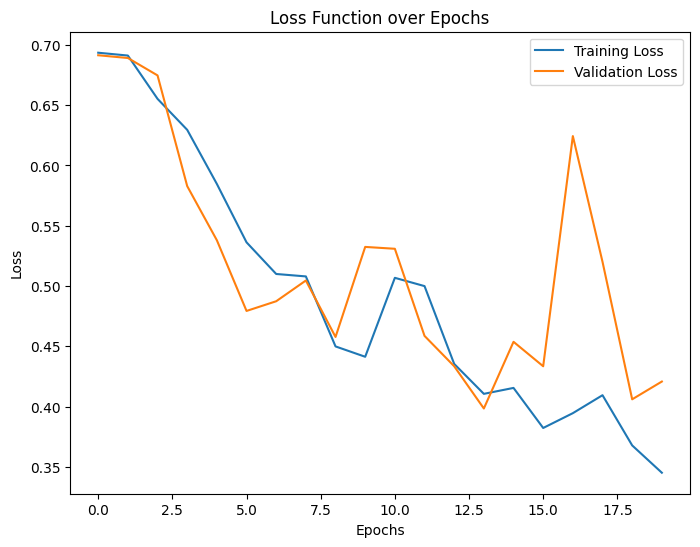

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 3.3: Plot Training and Validation Accuracy

Here, we plot the training and validation accuracy over the 20 epochs. Accuracy measures the proportion of correctly classified images. By comparing training and validation accuracy, we can determine if the model is generalizing well to unseen data or if it is overfitting to the training data.



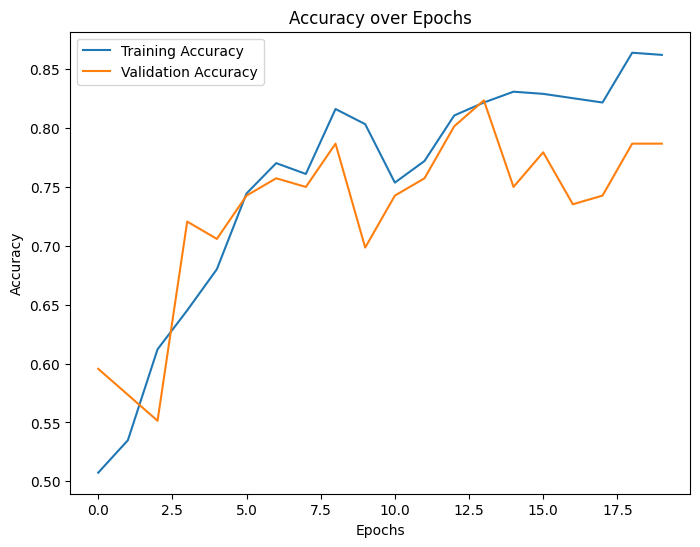

In [ ]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 4: Transfer Learning Models and Comparison

In this cell, we apply transfer learning using several pretrained models such as VGG16, ResNet50, InceptionV3, and others. These models have been pre-trained on large image datasets (ImageNet) and can be fine-tuned for the specific task of pothole detection.

We use `ImageDataGenerator` to preprocess images for the models, which includes resizing images to 224x224 pixels, rescaling pixel values, and splitting the data into training and validation sets.

For each model, we:
- Load the pretrained base model without its top layers (`include_top=False`).
- Add custom classification layers, including global average pooling, a fully connected layer, a dropout layer, and a final sigmoid output layer for binary classification.
- Compile and train the model on the dataset.

After training, we evaluate each model’s performance by calculating the accuracy, loss, and generating confusion matrices and classification reports.

Finally, we compare the accuracy of each model and plot the results to determine the best-performing model for the task.



Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training VGG16
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726270243.920139     114 service.cc:145] XLA service 0x7f0cac00c630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726270243.920216     114 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4844 - loss: 0.7700 

I0000 00:00:1726270254.149546     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 778ms/step - accuracy: 0.5984 - loss: 0.6759 - val_accuracy: 0.9259 - val_loss: 0.4544
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.8271 - loss: 0.4737 - val_accuracy: 0.9333 - val_loss: 0.3480
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.9010 - loss: 0.3603 - val_accuracy: 0.9407 - val_loss: 0.2760
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.8758 - loss: 0.3031 - val_accuracy: 0.9259 - val_loss: 0.2461
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9296 - loss: 0.2483 - val_accuracy: 0.9630 - val_loss: 0.1928
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.9181 - loss: 0.2416 - val_accuracy: 0.9556 - val_loss: 0.1742
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.9173 - loss: 0.2335 - val_accuracy: 0.9630 - val_loss: 0.1507
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.9264 - loss: 0.1929 - val_accuracy: 0.9704

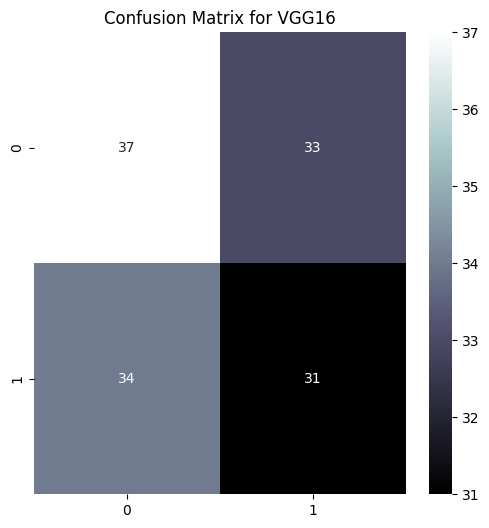

Classification Report for VGG16:
              precision    recall  f1-score   support

      normal       0.52      0.53      0.52        70
    potholes       0.48      0.48      0.48        65

    accuracy                           0.50       135
   macro avg       0.50      0.50      0.50       135
weighted avg       0.50      0.50      0.50       135

Accuracy: 97.78%



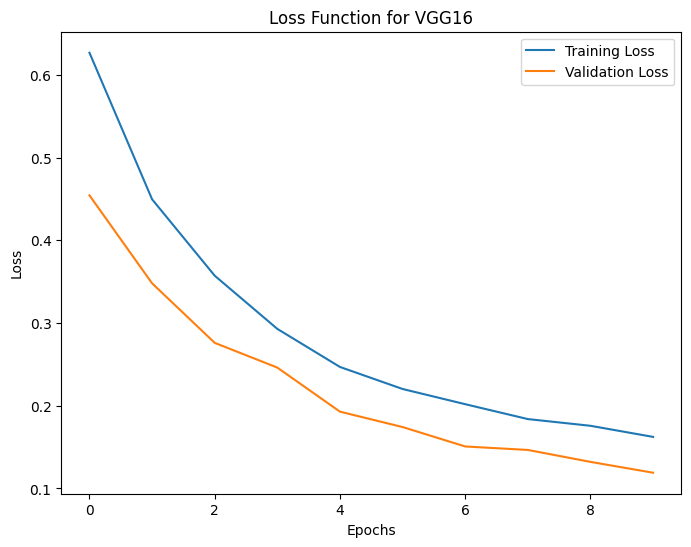

Training ResNet50
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 851ms/step - accuracy: 0.5382 - loss: 0.7978 - val_accuracy: 0.4815 - val_loss: 0.7131
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.5327 - loss: 0.7051 - val_accuracy: 0.4815 - val_loss: 0.6999
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.5538 - loss: 0.6889 - val_accuracy: 0.6667 - val_loss: 0.6728
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.5837 - loss: 0.6763 - val_accuracy: 0.6815 - val_loss: 0.6689
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.6040 - loss: 0.6692 - val_accuracy: 0.5333 - val_loss: 0.6714
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.5600 - loss: 0.6761 - val_accuracy: 0.5926 - val_loss: 0.6724
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.5999 - loss: 0.6714 - val_accuracy: 0.6667 - val_loss: 0.6648
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.6196 - loss:

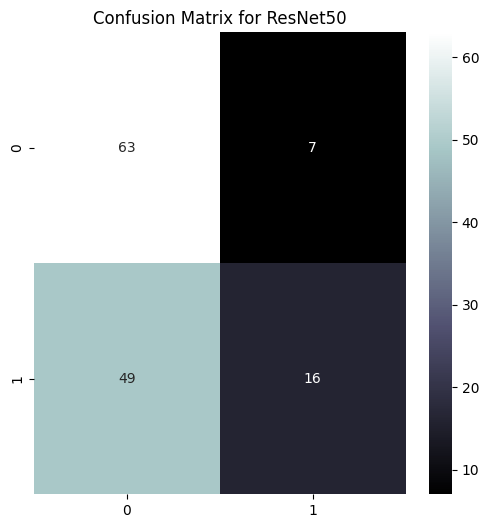

Classification Report for ResNet50:
              precision    recall  f1-score   support

      normal       0.56      0.90      0.69        70
    potholes       0.70      0.25      0.36        65

    accuracy                           0.59       135
   macro avg       0.63      0.57      0.53       135
weighted avg       0.63      0.59      0.53       135

Accuracy: 64.44%



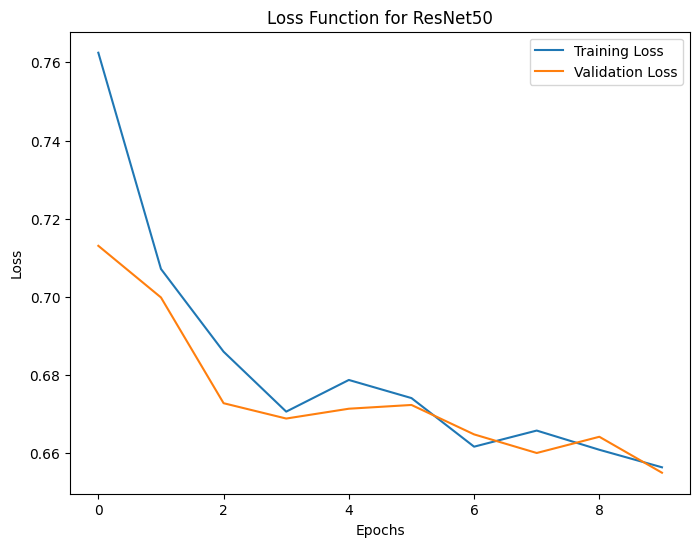

Training InceptionV3
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7289 - loss: 0.5139 - val_accuracy: 0.9481 - val_loss: 0.1405
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.9628 - loss: 0.1085 - val_accuracy: 0.9630 - val_loss: 0.1091
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9583 - loss: 0.0729 - val_accuracy: 0.9481 - val_loss: 0.0957
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9782 - loss: 0.0610 - val_accuracy: 0.9556 - val_loss: 0.1054
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.9909 - loss: 0.0338 - val_accuracy: 0.9630 - val_loss: 0.0988
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.9808 - loss: 0.0447 - val_accuracy: 0.9556 - val_loss: 0.1100
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0.9630 - val_loss: 0.1018
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.9891 - loss: 0

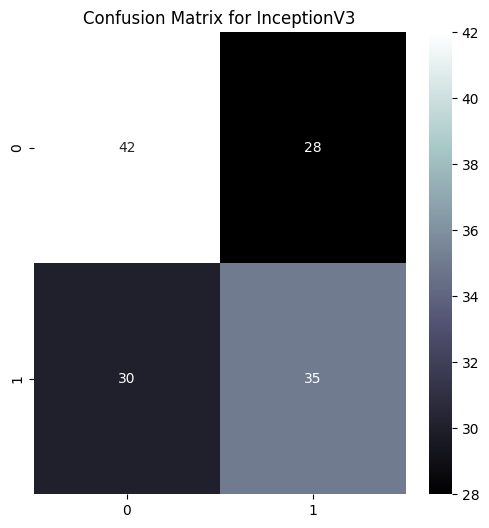

Classification Report for InceptionV3:
              precision    recall  f1-score   support

      normal       0.58      0.60      0.59        70
    potholes       0.56      0.54      0.55        65

    accuracy                           0.57       135
   macro avg       0.57      0.57      0.57       135
weighted avg       0.57      0.57      0.57       135

Accuracy: 95.56%



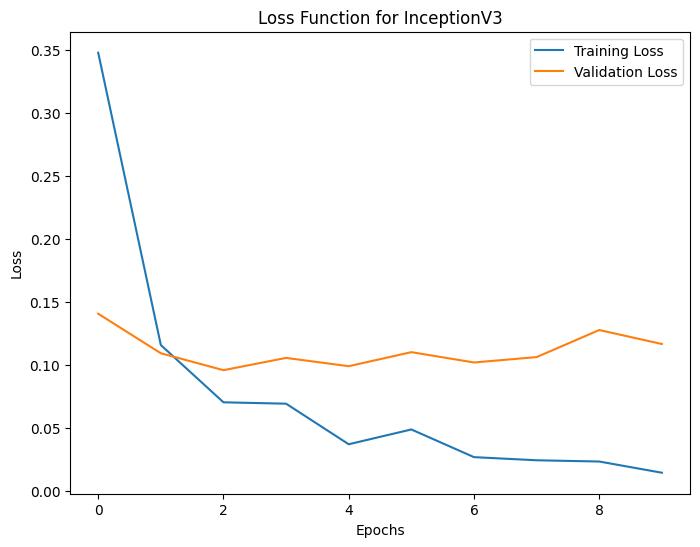

Training EfficientNetB0
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5023 - loss: 0.7022 - val_accuracy: 0.5185 - val_loss: 0.6944
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.4758 - loss: 0.6978 - val_accuracy: 0.5185 - val_loss: 0.6925
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.4892 - loss: 0.6902 - val_accuracy: 0.5185 - val_loss: 0.6931
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4848 - loss: 0.6951 - val_accuracy: 0.4815 - val_loss: 0.6933
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.4921 - loss: 0.6957 - val_accuracy: 0.5185 - val_loss: 0.6929
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.5592 - loss: 0.6909 - val_accuracy: 0.5185 - val_loss: 0.6924
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.5281 - loss: 0.6899 - val_accuracy: 0.5185 - val_loss: 0.6925
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.4582 - loss: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


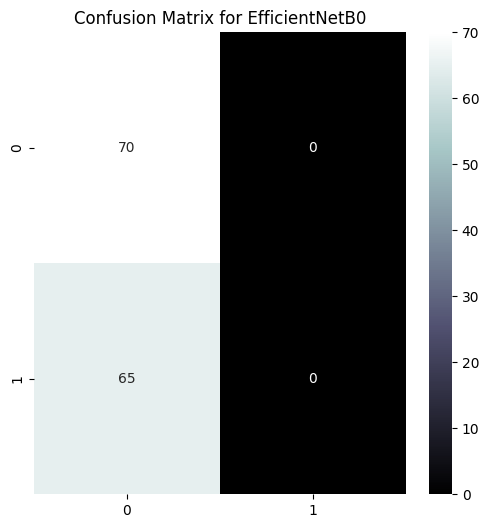

Classification Report for EfficientNetB0:
              precision    recall  f1-score   support

      normal       0.52      1.00      0.68        70
    potholes       0.00      0.00      0.00        65

    accuracy                           0.52       135
   macro avg       0.26      0.50      0.34       135
weighted avg       0.27      0.52      0.35       135

Accuracy: 51.85%



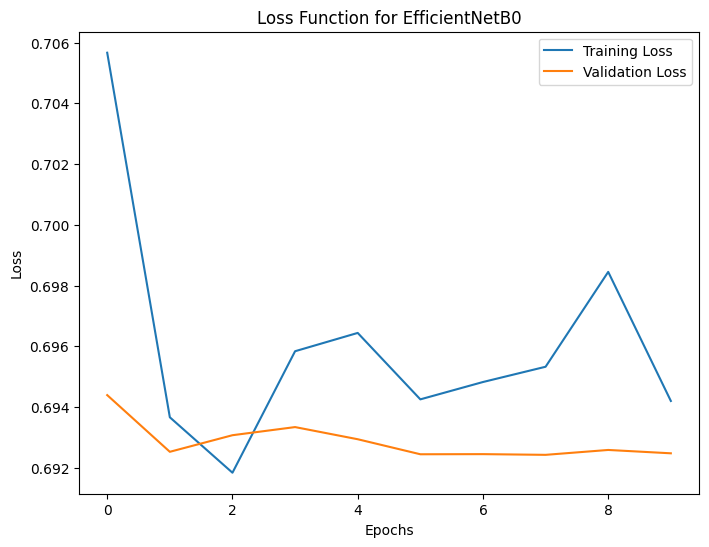

Training DenseNet121
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7197 - loss: 0.6165 - val_accuracy: 0.9481 - val_loss: 0.1245
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.9362 - loss: 0.1493 - val_accuracy: 0.9704 - val_loss: 0.0790
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.9634 - loss: 0.1055 - val_accuracy: 0.9556 - val_loss: 0.0916
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.9760 - loss: 0.0713 - val_accuracy: 0.9630 - val_loss: 0.1014
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.9630 - val_loss: 0.0954
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.9935 - loss: 0.0412 - val_accuracy: 0.9556 - val_loss: 0.1057
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - accuracy: 0.9942 - loss: 0.0385 - val_accuracy: 0.9556 - val_loss: 0.1163
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.9886 - loss: 

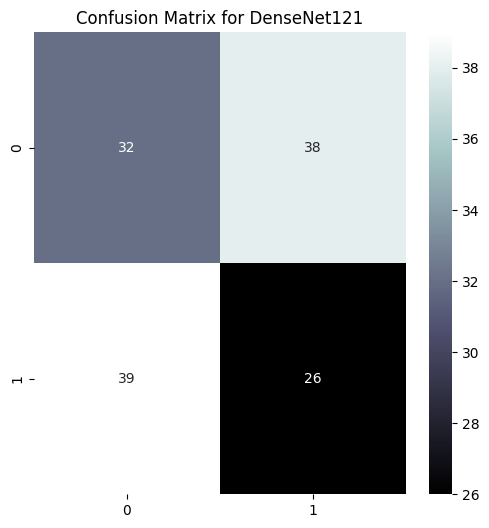

Classification Report for DenseNet121:
              precision    recall  f1-score   support

      normal       0.45      0.46      0.45        70
    potholes       0.41      0.40      0.40        65

    accuracy                           0.43       135
   macro avg       0.43      0.43      0.43       135
weighted avg       0.43      0.43      0.43       135

Accuracy: 96.30%



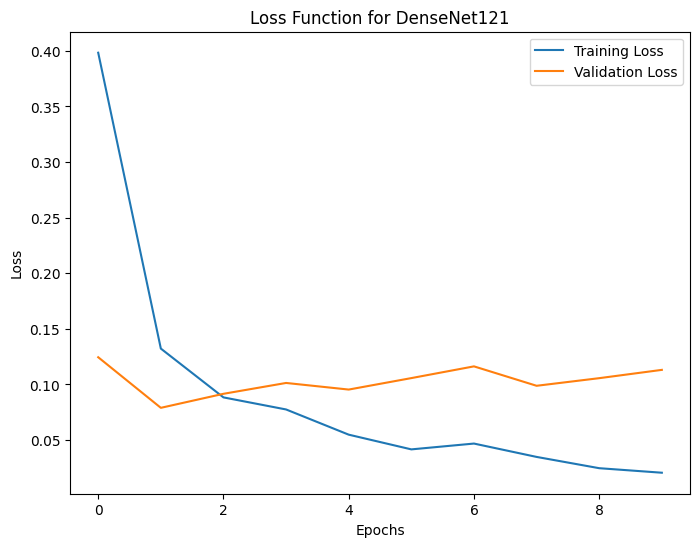

Training MobileNetV2
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 761ms/step - accuracy: 0.7281 - loss: 0.4503 - val_accuracy: 0.9630 - val_loss: 0.0979
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 379ms/step - accuracy: 0.9513 - loss: 0.1226 - val_accuracy: 0.9407 - val_loss: 0.0932
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.9720 - loss: 0.0861 - val_accuracy: 0.9704 - val_loss: 0.0937
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.9865 - loss: 0.0607 - val_accuracy: 0.9556 - val_loss: 0.0865
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.9820 - loss: 0.0480 - val_accuracy: 0.9407 - val_loss: 0.1007
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.9858 - loss: 0.0606 - val_accuracy: 0.9556 - val_loss: 0.0927
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.9981 - loss: 0.0246 - val_accuracy: 0.9333 - val_loss: 0.0976
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 1.0000 - loss: 0.

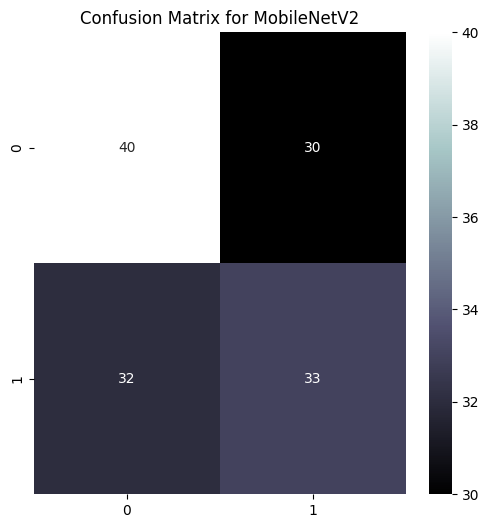

Classification Report for MobileNetV2:
              precision    recall  f1-score   support

      normal       0.56      0.57      0.56        70
    potholes       0.52      0.51      0.52        65

    accuracy                           0.54       135
   macro avg       0.54      0.54      0.54       135
weighted avg       0.54      0.54      0.54       135

Accuracy: 95.56%



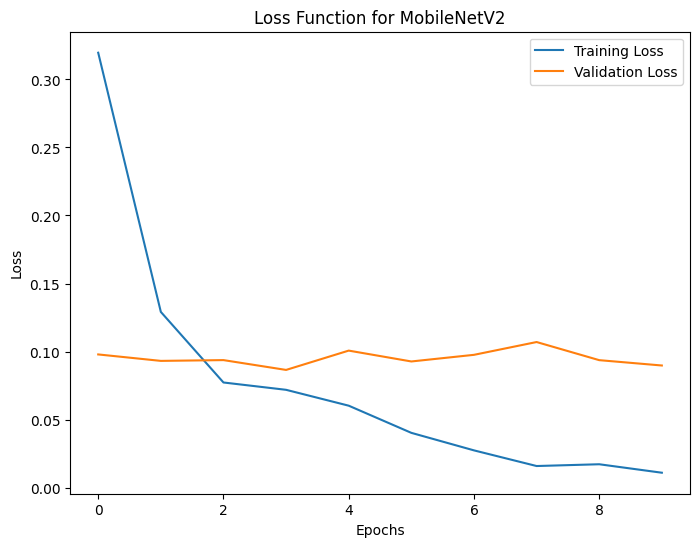

Training Xception
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 750ms/step - accuracy: 0.7407 - loss: 0.4565 - val_accuracy: 0.9556 - val_loss: 0.1247
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.9486 - loss: 0.1163 - val_accuracy: 0.9556 - val_loss: 0.1169
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.9769 - loss: 0.0841 - val_accuracy: 0.9630 - val_loss: 0.1066
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.9847 - loss: 0.0651 - val_accuracy: 0.9630 - val_loss: 0.0933
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.9846 - loss: 0.0445 - val_accuracy: 0.9630 - val_loss: 0.0905
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.9556 - val_loss: 0.0926
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.9993 - loss: 0.0239 - val_accuracy: 0.9630 - val_loss: 0.0911
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9910 - loss: 

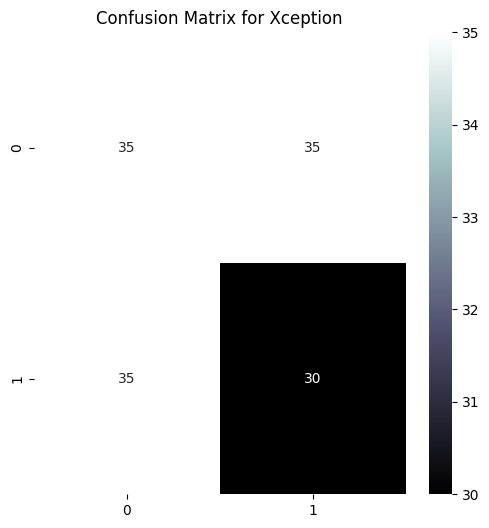

Classification Report for Xception:
              precision    recall  f1-score   support

      normal       0.50      0.50      0.50        70
    potholes       0.46      0.46      0.46        65

    accuracy                           0.48       135
   macro avg       0.48      0.48      0.48       135
weighted avg       0.48      0.48      0.48       135

Accuracy: 95.56%



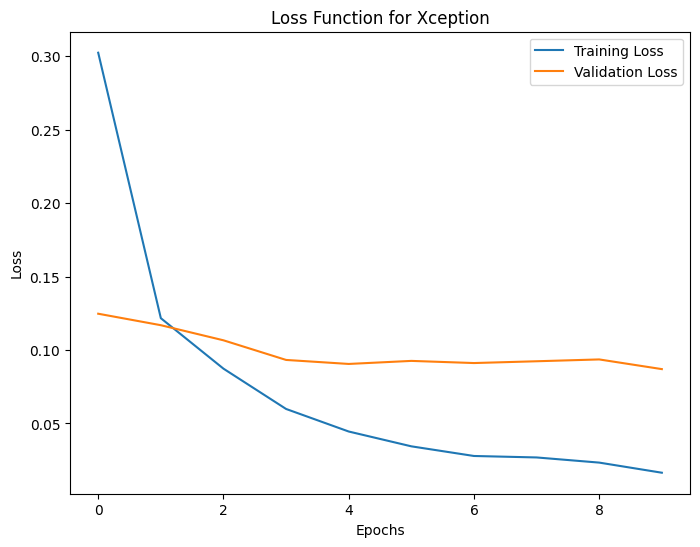

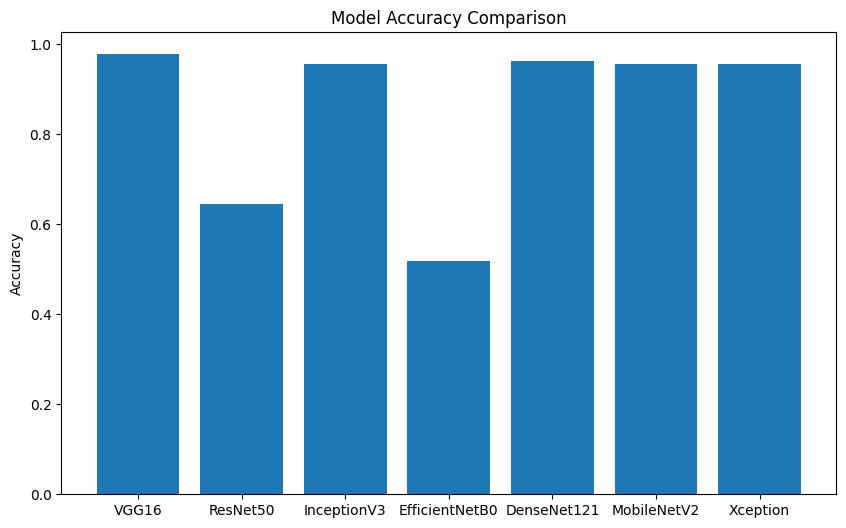

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, DenseNet121, MobileNetV2, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
normal_path = '/content/drive/MyDrive/SC project/normal'
potholes_path = '/content/drive/MyDrive/SC project/potholes'

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('/content/drive/MyDrive/SC project/',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training')

val_gen = datagen.flow_from_directory('/content/drive/MyDrive/SC project/',
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation')

# Model list
models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'EfficientNetB0': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'Xception': Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Function to add classification layers and compile models
def build_model(base_model):
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train, evaluate and collect results
results = {}
for name, base_model in models.items():
    print(f"Training {name}")
    model = build_model(base_model)

    # Train the model
    history = model.fit(train_gen, validation_data=val_gen, epochs=10)

    # Evaluate on validation set
    val_pred = model.predict(val_gen)
    val_pred_labels = (val_pred > 0.5).astype(int)
    y_true = val_gen.classes

    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_true, val_pred_labels)
    cr = classification_report(y_true, val_pred_labels, target_names=val_gen.class_indices.keys())

    # Store results
    results[name] = {
        'accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'confusion_matrix': cm,
        'classification_report': cr
    }

    # Plot Confusion Matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='bone')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {name}:\n{cr}")
    print(f"Accuracy: {results[name]['accuracy'] * 100:.2f}%\n")

    # Plot Loss Function Graphs
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Function for {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Compare models' accuracy
accuracies = [results[model]['accuracy'] for model in models]
plt.figure(figsize=(10,6))
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()